In [20]:
import pandas as pd
import matplotlib.pyplot as plt

outbreakfilename = 'Resources/NationalOutbreakPublicDataToolFull.xlsx'

In [21]:
obdf = pd.read_excel(outbreakfilename)
obdf.loc[obdf['State'] == 'New Jersey']

,Year,Month,State,Primary Mode,Etiology,Serotype or Genotype,Etiology Status,Setting,Illnesses,Hospitalizations,...,Deaths,Info on Deaths,Food Vehicle,Food Contaminated Ingredient,IFSAC Category,Water Exposure,Water Type,Animal Type,Animal Type Specify,Water Status
426,2009,1,New Jersey,Indeterminate/Other/Unknown,Norovirus,NaN,Confirmed,NaN,26,0.0,...,0.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2038,2010,4,New Jersey,Food,Norovirus,NaN,Confirmed,Restaurant - Sit-down dining,11,0.0,...,0.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2077,2010,1,New Jersey,Food,NaN,NaN,NaN,Restaurant - Sit-down dining,5,0.0,...,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2124,2010,4,New Jersey,Food,NaN,NaN,NaN,Private home/residence,17,1.0,...,0.0,17.0,coleslaw; fruit salad,NaN,Multiple,NaN,NaN,NaN,NaN,NaN
2125,2010,1,New Jersey,Food,Norovirus,NaN,Confirmed,Caterer (food prepared off-site from where ser...,36,0.0,...,0.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57134,2019,3,New Jersey,Person-to-person,NaN,NaN,NaN,Child day care,9,0.0,...,0.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57135,2019,6,New Jersey,Indeterminate/Other/Unknown,NaN,NaN,NaN,"Other, specify",35,0.0,...,0.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57136,2019,7,New Jersey,Person-to-person,Norovirus unknown,NaN,Suspected,Restaurant,22,1.0,...,0.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57137,2019,12,New Jersey,Person-to-person,NaN,NaN,NaN,Child day care,31,0.0,...,0.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
obdf.columns

Index(['Year', 'Month', 'State', 'Primary Mode', 'Etiology',
       'Serotype or Genotype', 'Etiology Status', 'Setting', 'Illnesses',
       'Hospitalizations', 'Info on Hospitalizations', 'Deaths',
       'Info on Deaths', 'Food Vehicle', 'Food Contaminated Ingredient',
       'IFSAC Category', 'Water Exposure', 'Water Type', 'Animal Type',
       'Animal Type Specify', 'Water Status'],
      dtype='object')

In [23]:
obdf.dtypes

Year                              int64
Month                             int64
State                            object
Primary Mode                     object
Etiology                         object
Serotype or Genotype             object
Etiology Status                  object
Setting                          object
Illnesses                         int64
Hospitalizations                float64
Info on Hospitalizations        float64
Deaths                          float64
Info on Deaths                  float64
Food Vehicle                     object
Food Contaminated Ingredient     object
IFSAC Category                   object
Water Exposure                   object
Water Type                       object
Animal Type                      object
Animal Type Specify              object
Water Status                     object
dtype: object

In [24]:
# convert the year and month columns to a proper datetime index, and get rid of the old fields
obdf['date'] = pd.to_datetime(dict(year=obdf['Year'], month=obdf['Month'], day=1))
obdf.set_index('date',inplace=True)
obdf.drop(['Year','Month'],axis=1,inplace=True)
obdf.dtypes

State                            object
Primary Mode                     object
Etiology                         object
Serotype or Genotype             object
Etiology Status                  object
Setting                          object
Illnesses                         int64
Hospitalizations                float64
Info on Hospitalizations        float64
Deaths                          float64
Info on Deaths                  float64
Food Vehicle                     object
Food Contaminated Ingredient     object
IFSAC Category                   object
Water Exposure                   object
Water Type                       object
Animal Type                      object
Animal Type Specify              object
Water Status                     object
dtype: object

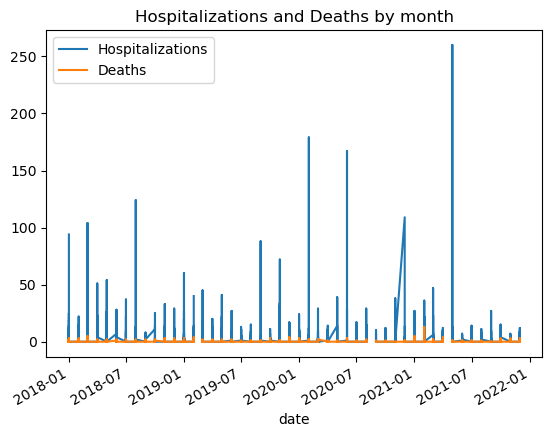

In [25]:
ob1822df = obdf[['State','Hospitalizations','Deaths']].loc[obdf.index >= '2018-01-01']
ob1822df = ob1822df.loc[ob1822df.index <= '2022-12-31'].plot()
plt.title('Hospitalizations and Deaths by month')
plt.show()